Shreyansh Misra

# I. Creating the Datasets

###### Importing Dependencies

In [1]:
import requests
import re
import numpy as np
from bs4 import BeautifulSoup as bs

###### List of S&P500 Compaines and their Weights

The S&P500 is an index tracking the stock performance of the top 500 publicly traded companies in the United States by market capitalization. The depth and diversity of the index makes it one of the best gagues of prominent American equities' performance, and by extension, that of the stock market overall. This dataset was selected as companies within the S&P500 are well established and have large market capitalizations in a variety of industires, thereby making them low-risk equities for investment.

In [2]:
sp500_url = "https://thirsty-golick-fbd29a.netlify.app/table"

###### Web Scraping

In [3]:
res = requests.get(sp500_url)
soup = bs(res.text, 'html.parser')

table = soup.findAll('table')[0].findAll('tbody')

###### List of Stock Tickers

In [4]:
SP500 = []

#
for i, ticker in enumerate(table[0]):
    if len(ticker) > 1:
        
        #
        text = re.sub(r"[<trd>]", "", str(ticker))
        text = text.split('/')
        
        SP500.append(text[4])
        
        
SP500[0], SP500[1], SP500[2]

('\n class="g-0lax"span syle="fon-weigh:400;fon-syle:nomal;ex-ecoaion:none;colo:#000;backgoun-colo:anspaen"MSFT',
 '\n class="g-0lax"span syle="fon-weigh:400;fon-syle:nomal;ex-ecoaion:none;colo:#000;backgoun-colo:anspaen"AAPL',
 '\n class="g-0lax"span syle="fon-weigh:400;fon-syle:nomal;ex-ecoaion:none;colo:#000;backgoun-colo:anspaen"AMZN')

###### Cleaning Tickers Dataset

In [5]:
# removing text styling prefix
SP500 = [value.removeprefix('\n class="g-0lax"span syle="fon-weigh:400;fon-syle:nomal;ex-ecoaion:none;colo:#000;backgoun-colo:anspaen"') for value in SP500]

# removing element 99 "span"
SP500.pop(99)


print(SP500)

['MSFT', 'AAPL', 'AMZN', 'TSLA', 'GOOGL', 'GOOG', 'FB', 'NVDA', 'BRK.B', 'JPM', 'JNJ', 'UNH', 'HD', 'V', 'PG', 'BAC', 'DIS', 'ADBE', 'MA', 'CRM', 'NFLX', 'XOM', 'PFE', 'PYPL', 'CMCSA', 'TMO', 'CSCO', 'ACN', 'PEP', 'AVGO', 'NKE', 'COST', 'CVX', 'KO', 'ABT', 'VZ', 'WMT', 'LLY', 'WFC', 'ABBV', 'INTC', 'MRK', 'MCD', 'DHR', 'QCOM', 'T', 'TXN', 'LIN', 'INTU', 'NEE', 'LOW', 'AMD', 'MDT', 'ORCL', 'HON', 'UNP', 'UPS', 'PM', 'MS', 'AMAT', 'SBUX', 'RTX', 'GS', 'NOW', 'BLK', 'C', 'BMY', 'ISRG', 'AMT', 'TGT', 'CVS', 'BA', 'SCHW', 'AMGN', 'GE', 'AXP', 'CAT', 'SPGI', 'IBM', 'PLD', 'BKNG', 'MMM', 'ANTM', 'ZTS', 'COP', 'DE', 'ADI', 'ADP', 'SYK', 'PNC', 'CHTR', 'LRCX', 'MDLZ', 'TJX', 'TFC', 'GM', 'CB', 'LMT', 'MO', 'GILD', 'MU', 'USB', 'MMC', 'EL', 'CSX', 'CME', 'DUK', 'CCI', 'SHW', 'ICE', 'F', 'EW', 'CI', 'TMUS', 'ADSK', 'FIS', 'EQIX', 'NSC', 'BDX', 'COF', 'APD', 'ETN', 'ITW', 'SO', 'CL', 'AON', 'REGN', 'KLAC', 'MCO', 'WM', 'D', 'DXCM', 'BSX', 'HCA', 'ILMN', 'FISV', 'FDX', 'NXPI', 'EMR', 'HUM', 'ECL', 

###### List of Stock Tickers

In [6]:
weight500 = []

#
for i, ticker in enumerate(table[0]):
    if len(ticker) > 1:
        
        text = re.sub(r"[<trd>]", "", str(ticker))
        text = text.split('/')
        
        weight500.append(text[6])

weight500[0], weight500[1], weight500[2]

('\n class="g-0lax"span syle="fon-weigh:400;fon-syle:nomal;ex-ecoaion:none;colo:#000;backgoun-colo:anspaen"6.33576',
 '\n class="g-0lax"span syle="fon-weigh:400;fon-syle:nomal;ex-ecoaion:none;colo:#000;backgoun-colo:anspaen"5.95990',
 '\n class="g-0lax"span syle="fon-weigh:400;fon-syle:nomal;ex-ecoaion:none;colo:#000;backgoun-colo:anspaen"3.84511')

###### Cleaning Weights Dataset

In [7]:
# removing text styling prefix
weight500 = [value.removeprefix('\n class="g-0lax"span syle="fon-weigh:400;fon-syle:nomal;ex-ecoaion:none;colo:#000;backgoun-colo:anspaen"') for value in weight500]

# removing element 99 "span"
weight500.pop(99)

'span'

###### Converting Weights from Percentage to Decimals

In [8]:
# converting weight500 elements from strings to floats
weight500 = list(np.float_(weight500))

# dividing all weights by 100
weight500[:] = [x / 100 for x in weight500]

# round all weights to four decimal places
weight500[:] = [round(num, 4) for num in weight500]

# weights cannot equal zero
if any(i == 0.0000 for i in weight500):
    print("Fail")
else:
    print("Pass")

print(weight500)

Pass
[0.0634, 0.0596, 0.0385, 0.0249, 0.0225, 0.0211, 0.0204, 0.0186, 0.0134, 0.0126, 0.0108, 0.0108, 0.0098, 0.0092, 0.0089, 0.0087, 0.008, 0.0079, 0.0076, 0.0075, 0.0072, 0.0069, 0.0068, 0.0067, 0.0062, 0.0061, 0.006, 0.0059, 0.0058, 0.0058, 0.0057, 0.0057, 0.0056, 0.0055, 0.0055, 0.0054, 0.0054, 0.0053, 0.0052, 0.0052, 0.0052, 0.0052, 0.0048, 0.0047, 0.0046, 0.0045, 0.0045, 0.0043, 0.0042, 0.0042, 0.0042, 0.0042, 0.0041, 0.0039, 0.0039, 0.0039, 0.0038, 0.0037, 0.0037, 0.0035, 0.0035, 0.0035, 0.0034, 0.0034, 0.0034, 0.0034, 0.0033, 0.0033, 0.0032, 0.0032, 0.0031, 0.0031, 0.0031, 0.003, 0.003, 0.0029, 0.0028, 0.0028, 0.0028, 0.0027, 0.0027, 0.0026, 0.0026, 0.0026, 0.0025, 0.0025, 0.0025, 0.0024, 0.0023, 0.0022, 0.0022, 0.0022, 0.0022, 0.0022, 0.0022, 0.0021, 0.0021, 0.0021, 0.0021, 0.0021, 0.0021, 0.0021, 0.0021, 0.002, 0.002, 0.002, 0.002, 0.002, 0.0019, 0.0019, 0.0019, 0.0019, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0016, 0.0

###### Checking Lengths of Datasets

Weights will correspond to a stock ticker of the same index. Ensuring that the two lists have the same length ensures that there aren't any missing elements and that the weights correspond to the right ticker. We also observe that the S&P500 does not have exactly 500 tickers. This is because some companies have multiple classes of shares with large market capitalizations. For example, Alphabet (holding company of Google) lists both GOOG and GOOGL.

In [9]:
numTickers = len(SP500)
numWeights = len(weight500)

(numTickers, numWeights)

(504, 504)

# II. Screening Stocks

###### Importing Dependencies

In [10]:
import time
import os
import pandas as pd
import pickle as pkl

###### Ameritrade API

Ameritrade's API provides free stock data for almost all publicly traded stocks in the United States. As API keys are confidential, my Ameritrade API key was stored within a `keys.py` file. 

In [11]:
from keys import ameritrade
url = 'https://api.tdameritrade.com/v1/instruments'

In [12]:
def getMetrics(tickers):
    
    # ameritrade has limits on how many requests at a time
    start = 0
    end = 500
    
    while start < len(tickers):
        tickers = tickers[start:end]
    
        # api
        payload = {'apikey':ameritrade,
                   'symbol': tickers,
                   'projection':'fundamental'}

        results = requests.get(url,params=payload)
        data = results.json()

        # file
        name = 'temp' + '.pkL'

        files = []
        files.append(name)

        with open(name, 'wb') as file:
                pkl.dump(data, file)
            
        start = end
        end += 500

        time.sleep(1)
    
    
    #
    StockData = []

    for file in files:
        with open(file, 'rb') as f:
            info = pkl.load(f)

        tickers = list(info)
        metrics = ['symbol', 'peRatio', 'pegRatio', 'returnOnEquity', 'returnOnEquity']

        for ticker in tickers:
            row = []

            for metric in metrics:
                row.append(info[ticker]['fundamental'][metric])

            StockData.append(row)

        os.remove(file)
    
    # dataframe
    Titles = ['Ticker', 'Price to Earnings Ratio', 'Price to Earnings Growth', 'Return on Equity', 'Earnings Per Share Growth']
    df = pd.DataFrame(StockData, columns=Titles)

    return df        

###### Stock Metrics Dataframe

Notice that there are 493 stocks listed in the dataframe, rather than the 504 stocks listed in the list `SP500`. This indicates that we were not able to find information for 11 stocks.

In [13]:
metrics500 = getMetrics(tickers=SP500)
metrics500

,Ticker,Price to Earnings Ratio,Price to Earnings Growth,Return on Equity,Earnings Per Share Growth
0,TER,21.98038,0.000000,34.92339,34.92339
1,IPG,12.25141,0.391201,30.36495,30.36495
2,LVS,0.00000,0.000000,0.00000,0.00000
3,WYNN,0.00000,0.000000,0.00000,0.00000
4,TFC,11.73398,0.767079,10.03857,10.03857
...,...,...,...,...,...
488,GRMN,19.07120,0.000000,17.72269,17.72269
489,CCL,0.00000,0.000000,0.00000,0.00000
490,FIS,74.14937,0.085784,1.78297,1.78297
491,BAX,30.28800,0.000000,11.65216,11.65216


###### Screening Stocks

The proccess of screening stocks varies from person to person. There are a large number of factor models, stock metrics, and alternative data sources that can be taken into account whilst screening stocks. For the simplicity of this project, I chose the metrics Net Profit Margin, Price to Earnings Ratio, Growth in Price to Earnings Ratio, and the 52 Week High in order to assess the stocks. Assuming that a stock met the conditions for each of these metrics, it would pass the screening and would be a part of the final portfolio.

The conditions themselves in LaTex

In [14]:
screen = metrics500[(metrics500['Price to Earnings Growth'] < 1 & (metrics500['Price to Earnings Growth'] > 0.4) & (metrics500['Return on Equity'] > 20) & (metrics500['Price to Earnings Ratio'] > 30) & (metrics500['Earnings Per Share Growth'] > 40))]
screen

,Ticker,Price to Earnings Ratio,Price to Earnings Growth,Return on Equity,Earnings Per Share Growth
54,V,32.43193,0.896747,42.42532,42.42532
61,NVDA,50.20367,0.654839,41.95237,41.95237
173,IT,34.76001,0.951695,382.39060,382.39060
240,MA,35.89780,0.968701,153.79370,153.79370
324,VRSK,31.30642,0.561549,41.01540,41.01540


###### List of Top Stocks and Corresponding Weights

In [15]:
portfolio = screen.Ticker.values.tolist()
portfolio, len(portfolio)

(['V', 'NVDA', 'IT', 'MA', 'VRSK'], 5)

In [16]:
hold = []

for top in portfolio:
    index = SP500.index(top)
    weight = weight500[index]
    
    hold.append([index, top ,weight])


df5 = pd.DataFrame(hold)
df5.columns =['Index', 'Ticker', 'Weight']

df5

,Index,Ticker,Weight
0,13,V,0.0092
1,7,NVDA,0.0186
2,285,IT,0.0007
3,18,MA,0.0076
4,235,VRSK,0.0009


###### Adjusting Stock Weights

The weights in the df_sw dataframe cannot be used since these are the stock's weightages with respect to the entire S&P500. With 278 stocks removed from the original amount, the weightage of the stocks needs to be adjusted accordingly. In the portfolio, the sum of stock weights should be equal to 100%. Therefore, we can use the formula below to calculate the adjusted weight of the stocks.

$$\frac{Weight}{\sum Weights} = \frac{Adjusted Weight}{100}$$

$$Adjusted   Weight = \frac{Weight}{\sum Weights} \times 100 $$ 

In [17]:
#Finding Sum of Weights
sumWeights = df5.Weight.values.tolist()
sum(sumWeights)

0.037

In [18]:
hold = []

for top in portfolio:
    index = SP500.index(top)
    adjWeight = (weight500[index] / 0.037) * 100 
    
    hold.append([index, top , adjWeight])


df5 = pd.DataFrame(hold)
df5.columns =['Index', 'Ticker', 'AdjustedWeight']

df5

,Index,Ticker,AdjustedWeight
0,13,V,24.864865
1,7,NVDA,50.270270
2,285,IT,1.891892
3,18,MA,20.540541
4,235,VRSK,2.432432


In [19]:
#Sum of Stock Weights is equal to 100
adjWeights = df5.AdjustedWeight.values.tolist()
weight500[:] = [round(num, 4) for num in weight500]

sum(adjWeights)

99.99999999999999

# III. Portfolio Optimization (Data Collection)

###### Importing Dependencies

In [20]:
import datetime as dt
from pandas_datareader import data as web
import matplotlib.pyplot as plt

###### Portfolio Tickers and Initial Weights

In [21]:
EqualWeights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])

adjWeights = list(np.float_(adjWeights))
adjWeights[:] = [x / 100 for x in adjWeights]
adjWeights = np.array(adjWeights)

portfolio, adjWeights

(['V', 'NVDA', 'IT', 'MA', 'VRSK'],
 array([0.24864865, 0.5027027 , 0.01891892, 0.20540541, 0.02432432]))

###### Historical Pricing Data

In [22]:
startDate = '2015-01-01'
todayDate = dt.datetime.today().strftime('%Y-%m-%d')

todayDate

'2022-08-14'

###### Stock Close Prices

A stock's closing price is the last price anyone paid for a share of that stock during the business hours of the exchange where the stock is listed. It's often used by investors to compare a stock's day-to-day performance (they are typically used in the line graphs depicting a stock's performance). The adjusted closing price of a stock factors in anything that could affect the stock's price after the market closes. 

In [23]:
adjClose = web.get_data_yahoo(portfolio, start=startDate, end=todayDate)
adjClose = adjClose['Adj Close']

adjClose.head()

Symbols,V,NVDA,IT,MA,VRSK
Date,,,,,
2015-01-02,62.883415,4.837622,83.599998,81.657890,62.517605
2015-01-05,61.495350,4.755916,82.099998,79.361031,61.706444
2015-01-06,61.099094,4.611723,81.349998,79.189476,61.491447
2015-01-07,61.917706,4.599707,82.599998,80.421310,61.530540
2015-01-08,62.748180,4.772738,83.430000,81.672211,62.146240


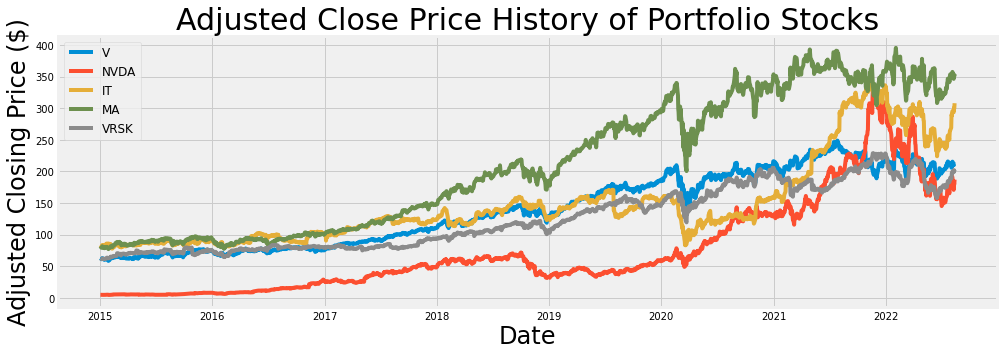

In [24]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 5))

stocks = adjClose

for x in stocks.columns.values:
  plt.plot(stocks[x],label=x)

title = 'Adjusted Close Price History of Portfolio Stocks'

plt.title(title, fontsize=30)
plt.xlabel('Date',fontsize=24)
plt.ylabel('Adjusted Closing Price ($)',fontsize=24)
plt.legend(stocks.columns.values,loc='upper left', fontsize=12)
plt.show()

In [25]:
logReturns = np.log(adjClose/adjClose.shift(1))
logReturns.head()

Symbols,V,NVDA,IT,MA,VRSK
Date,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN
2015-01-05,-0.022321,-0.017034,-0.018106,-0.028531,-0.013060
2015-01-06,-0.006465,-0.030788,-0.009177,-0.002164,-0.003490
2015-01-07,0.013309,-0.002609,0.015249,0.015436,0.000636
2015-01-08,0.013323,0.036928,0.009998,0.015435,0.009957


###### Mean Returns

In [26]:
meanReturns = logReturns.mean()
meanReturns

Symbols
V       0.000633
NVDA    0.001908
IT      0.000681
MA      0.000766
VRSK    0.000614
dtype: float64

###### Covariance Matrix

Covariance is a measure of the relationship between two or more variables. In finance, it is used to measure the relationship between two assets' returns. In practice, if there is a positive covariance, so the two stocks tend to move together. When one stock has a positive return, the other tends to have a positive return as well.

In [27]:
covMatrix = logReturns.cov()
covMatrix

Symbols,V,NVDA,IT,MA,VRSK
Symbols,,,,,
V,0.000269,0.000251,0.000166,0.000266,0.000140
NVDA,0.000251,0.000883,0.000224,0.000282,0.000187
IT,0.000166,0.000224,0.000360,0.000183,0.000136
MA,0.000266,0.000282,0.000183,0.000325,0.000148
VRSK,0.000140,0.000187,0.000136,0.000148,0.000218


The close price history, returns, and covariance matrix above were created primarily to illustrate and plot these ---. In practice, the function below will not utilize those dataframes and will instead compute everything within the function. 

# IV. Portfolio Optimization (Functions and Efficient Frontier)

###### Importing Dependencies

In [28]:
from scipy.optimize import minimize

In [29]:
def getData(stocks, start, end):
    stockData = web.get_data_yahoo(stocks, start=start, end=end)
    stockData = stockData['Close']
    returns = stockData.pct_change()
    meanReturns = returns.mean()
    covMatrix = returns.cov()
    return meanReturns, covMatrix

In [30]:
getData(portfolio, startDate, todayDate)

(Symbols
 V       0.000740
 NVDA    0.002331
 IT      0.000860
 MA      0.000903
 VRSK    0.000711
 dtype: float64,
 Symbols         V      NVDA        IT        MA      VRSK
 Symbols                                                  
 V        0.000269  0.000249  0.000165  0.000267  0.000139
 NVDA     0.000249  0.000892  0.000220  0.000280  0.000186
 IT       0.000165  0.000220  0.000358  0.000181  0.000135
 MA       0.000267  0.000280  0.000181  0.000326  0.000147
 VRSK     0.000139  0.000186  0.000135  0.000147  0.000217)

In [31]:
def portfolioPerformance(weights, meanReturns, covMatrix):
    returns = np.sum(meanReturns*weights)*252
    std = np.sqrt(
            np.dot(weights.T,np.dot(covMatrix, weights))
           )*np.sqrt(252)
    return returns, std

###### Adjusted Weights Performance

In [32]:
portfolioPerformance(adjWeights, meanReturns, covMatrix)

(0.3279680904108097, 0.32419442328111625)

###### Equal Weights Performance

In [33]:
portfolioPerformance(EqualWeights, meanReturns, covMatrix)

(0.23190225530815053, 0.2463626713923446)

Modern Portfolio Theory: Risk vs Reward     - portfolio risk and diversification
Devised by Harry Markowitz
Modern Portfolio Theory (MPT) is a theory on how risk-adverse investors can construct portfolios to maximize expected return based on a given level of market risk (Investopedia). 
Investors want to minimize risk and maximize reward

The purchasing of any asset comes with a potential risk and an associated potential reward
From our asset, we have asset the potential future distrbution of resutrns
We don't know what the stock returns would be in the future

check performance of adjusted weights portfolio
check weights of equal weighted portfolio

In [34]:
def negativeSR(weights, meanReturns, covMatrix, riskFreeRate = 0):
    pReturns, pStd = portfolioPerformance(weights, meanReturns, covMatrix)
    return - (pReturns - riskFreeRate)/pStd

def maxSR(meanReturns, covMatrix, riskFreeRate = 0, constraintSet=(0,1)):
    "Minimize the negative SR, by altering the weights of the portfolio"
    numAssets = len(meanReturns)
    args = (meanReturns, covMatrix, riskFreeRate)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = constraintSet
    bounds = tuple(bound for asset in range(numAssets))
    result = minimize(negativeSR, numAssets*[1./numAssets], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)
    return result

###### Sharpe Ratio of Adjusted S&P500 Weights Portfolio

In [35]:
negativeSR(adjWeights, meanReturns, covMatrix, riskFreeRate = 0)

-1.0116401358527418

###### Sharpe Ratio of Equal Weights Portfolio

In [36]:
negativeSR(EqualWeights, meanReturns, covMatrix, riskFreeRate = 0)

-0.9413043542576093

In [37]:
def portfolioVariance(weights, meanReturns, covMatrix):
    return portfolioPerformance(weights, meanReturns, covMatrix)[1]

def minimizeVariance(meanReturns, covMatrix, constraintSet=(0,1)):
    """Minimize the portfolio variance by altering the 
     weights/allocation of assets in the portfolio"""
    numAssets = len(meanReturns)
    args = (meanReturns, covMatrix)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = constraintSet
    bounds = tuple(bound for asset in range(numAssets))
    result = minimize(portfolioVariance, numAssets*[1./numAssets], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)
    return result

In [38]:
def portfolioReturn(weights, meanReturns, covMatrix):
        return portfolioPerformance(weights, meanReturns, covMatrix)[0]
    
def efficientOpt(meanReturns, covMatrix, returnTarget, constraintSet=(0,1)):
    """For each returnTarget, we want to optimise the portfolio for min variance"""
    numAssets = len(meanReturns)
    args = (meanReturns, covMatrix)
    constraints = ({'type':'eq', 'fun': lambda x: portfolioReturn(x, meanReturns, covMatrix) - returnTarget},
                    {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = constraintSet
    bounds = tuple(bound for asset in range(numAssets))
    effOpt = minimize(portfolioVariance, numAssets*[1./numAssets], args=args, method = 'SLSQP', bounds=bounds, constraints=constraints)
    return effOpt

In [39]:
def calculatedResults(meanReturns, covMatrix, riskFreeRate=0, constraintSet=(0,1)):
    """Read in mean, cov matrix, and other financial information
        Output, Max SR , Min Volatility, efficient frontier """
    # Max Sharpe Ratio Portfolio
    maxSR_Portfolio = maxSR(meanReturns, covMatrix)
    maxSR_returns, maxSR_std = portfolioPerformance(maxSR_Portfolio['x'], meanReturns, covMatrix)
    maxSR_returns, maxSR_std = round(maxSR_returns*100,2), round(maxSR_std*100,2)
    maxSR_allocation = pd.DataFrame(maxSR_Portfolio['x'], index=meanReturns.index, columns=['allocation'])
    maxSR_allocation.allocation = [round(i*100,0) for i in maxSR_allocation.allocation]
    
    # Min Volatility Portfolio
    minVol_Portfolio = minimizeVariance(meanReturns, covMatrix)
    minVol_returns, minVol_std = portfolioPerformance(minVol_Portfolio['x'], meanReturns, covMatrix)
    minVol_returns, minVol_std = round(minVol_returns*100,2), round(minVol_std*100,2)
    minVol_allocation = pd.DataFrame(minVol_Portfolio['x'], index=meanReturns.index, columns=['allocation'])
    minVol_allocation.allocation = [round(i*100,0) for i in minVol_allocation.allocation]
    # Efficient Frontier
    efficientList = []
    targetReturns = np.linspace(minVol_returns, maxSR_returns, 20)
    for target in targetReturns:
        efficientList.append(efficientOpt(meanReturns, covMatrix, target)['fun'])
    return maxSR_returns, maxSR_std, maxSR_allocation, minVol_returns, minVol_std, minVol_allocation, efficientList, targetReturns

In [40]:
maxSR_returns, maxSR_std, maxSR_allocation, minVol_returns, minVol_std, minVol_allocation, efficientList, targetReturns = calculatedResults(meanReturns, covMatrix, riskFreeRate=0, constraintSet=(0,1))

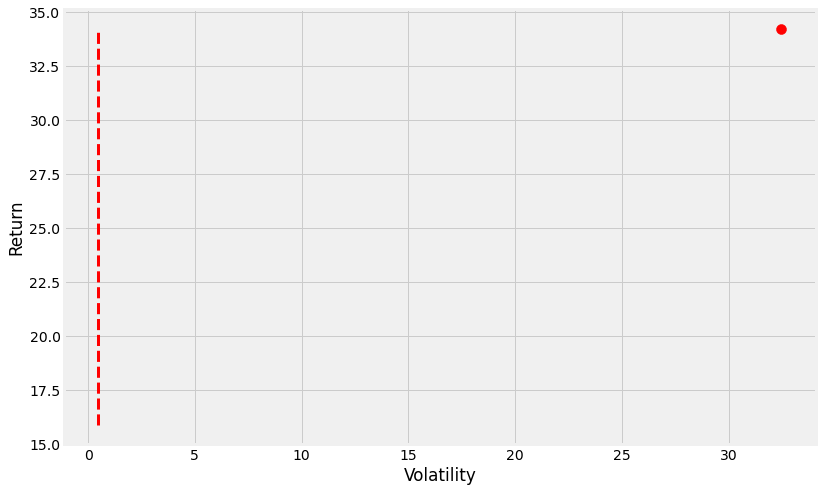

In [41]:
x = efficientList
y = targetReturns

plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')

plt.xlabel('Volatility')
plt.ylabel('Return')

# Max SR
plt.scatter(maxSR_std, maxSR_returns,c='red', s=100) # red dot


plt.plot(x, y, 'r--', linewidth=3)
plt.show()

In [42]:
np.random.seed(42)
num_ports = 6000
all_weights = np.zeros((num_ports, len(adjClose.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for x in range(num_ports):
    # Weights
    weights = np.array(np.random.random(5))
    weights = weights/np.sum(weights)
    
    # Save weights
    all_weights[x,:] = weights
    
    # Expected return
    ret_arr[x] = np.sum( (logReturns.mean() * weights * 252))
    
    # Expected volatility
    vol_arr[x] = np.sqrt(np.dot(weights.T, np.dot(logReturns.cov()*252, weights)))
    
    # Sharpe Ratio
    sharpe_arr[x] = ret_arr[x]/vol_arr[x]

In [43]:
print('Max SR: {}'.format(sharpe_arr.max()))
print('Location: {}'.format(sharpe_arr.argmax()))

Max SR: 1.0521829821180773
Location: 4304


In [44]:
print(all_weights[1648,:])

maxSR_return = ret_arr[sharpe_arr.argmax()]
maxSR_vol = vol_arr[sharpe_arr.argmax()]

[0.32929617 0.31407276 0.01132636 0.19092092 0.15438379]


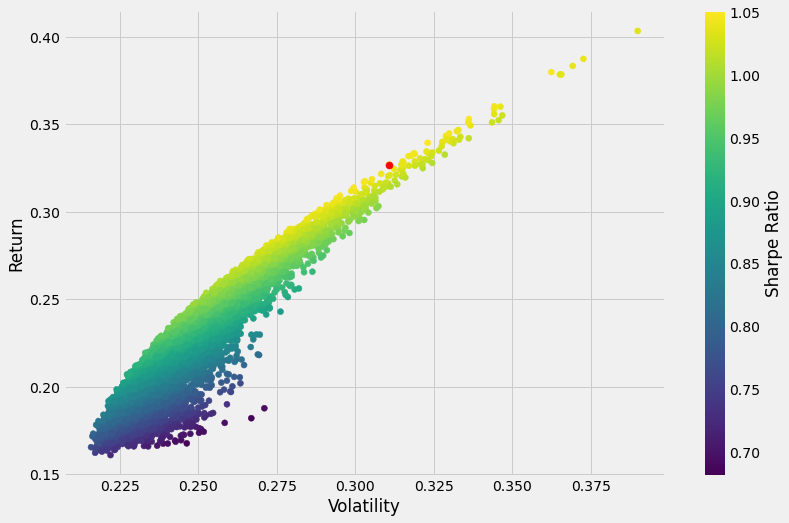

In [45]:
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(maxSR_vol, maxSR_return,c='red', s=50) # red dot
plt.show()

What we need to plot EF:
FIRST: CURVE + DOT

Random Portfolios:
ALL THE RANDOMS

In [46]:
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum(logReturns.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(logReturns.cov()*252, weights)))
    sr = ret/vol
    return np.array([ret, vol, sr])

def neg_sharpe(weights):
# the number 2 is the sharpe ratio index from the get_ret_vol_sr
    return get_ret_vol_sr(weights)[2] * -1

def check_sum(weights):
    #return 0 if sum of the weights is 1
    return np.sum(weights)-1

In [47]:
cons = ({'type':'eq', 'fun':check_sum})
bounds = ((0,1), (0,1), (0,1), (0,1), (0,1))
init_guess = [0.2, 0.2, 0.2, 0.2, 0.2]

In [48]:
opt_results = minimize(neg_sharpe, init_guess,method='SLSQP', bounds=bounds, constraints=cons)
print(opt_results)

     fun: -1.053759347249131
     jac: array([ 4.15731668e-02, -5.50448895e-05, -7.56978989e-06,  2.72274017e-04,
        6.21527433e-05])
 message: 'Optimization terminated successfully'
    nfev: 54
     nit: 9
    njev: 9
  status: 0
 success: True
       x: array([0.        , 0.56340726, 0.0969951 , 0.05060556, 0.28899208])


In [49]:
get_ret_vol_sr(opt_results.x)

array([0.34199839, 0.32455075, 1.05375935])

In [50]:
frontier_y = np.linspace(0.15,0.40,200)

In [51]:
def minimize_volatility(weights):
    return get_ret_vol_sr(weights)[1]

In [52]:
frontier_x = []

for possible_return in frontier_y:
    cons = ({'type':'eq', 'fun':check_sum},
            {'type':'eq', 'fun': lambda w: get_ret_vol_sr(w)[0] - possible_return})
    
    result = minimize(minimize_volatility,init_guess,method='SLSQP', bounds=bounds, constraints=cons)
    frontier_x.append(result['fun'])

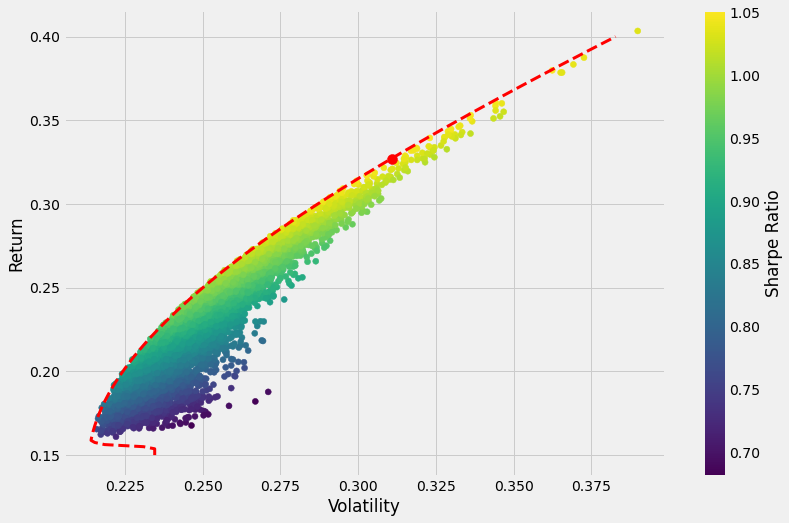

In [53]:
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(maxSR_vol, maxSR_return,c='red', s=100) # red dot
plt.plot(frontier_x,frontier_y, 'r--', linewidth=3)
plt.show()